<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/labs/lab_9_tomas_ausensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1w5HIG2LsuVnhhuEYfRvpBn4hHziWj_wW" width = "300" align="center"/>

El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

##Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.pipeline import make_pipeline, make_union
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df = df.set_index('id')
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0}) # target
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

Como se puede apreciar:
- No hay datos nulos en ninguna de las columnas
- Todos los atributos son numéricos, vale decir, es necesario el uso de un solo transformer para procesar los datos
- Los datos están en escalas considerablemente distintas. Para obtener resultados más apropiados, se vuelve necesario el uso de algun scaler.

2. Normalizar las variables numéricas con el método **StandardScaler**.

In [4]:
#Se separan los datos

In [5]:
from pandas.io import xml
X_1 = df.drop('diagnosis', axis= 1)
y = df['diagnosis']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_1)
X = pd.DataFrame(X_scaled, columns = X_1.columns, index = X_1.index) #.index para mantener los ids

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
926682,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
926954,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


3. Realizar un método de reducción de dimensionalidad visto en clases.

Como se tienen treinta atributos, la idea será ver, a través de la varianza acumulada explicada, el momento en que se pasa un cierto *threshold*.

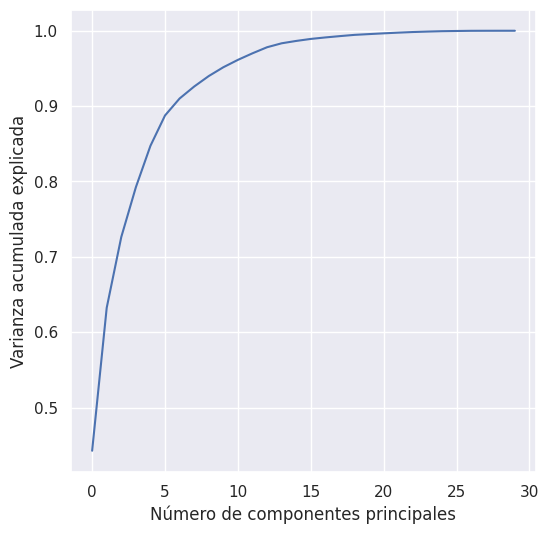

In [6]:
pca_test = PCA()

pca_test.fit(X.values)
cumulative_variance = np.cumsum(pca_test.explained_variance_ratio_)

plt.figure(figsize=(6,6))
plt.plot(cumulative_variance)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada explicada')
plt.show()

Así, se puede apreciar que, a partir de las 6 componentes, la varianza acumulada explicada supera el 90%. Por ende, serán usadas 6 componentes principales.

In [7]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(X.values)
X_pca = pd.DataFrame(data = pca_values, columns = [f'pca{n}' for n in range(1,7)], index = X.index)
X_pca

,pca1,pca2,pca3,pca4,pca5,pca6
id,,,,,,
842302,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411420
842517,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028659
84300903,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
84348301,7.122953,10.275589,-3.232789,0.152547,-2.960879,3.053422
84358402,3.935302,-1.948072,1.389767,2.940640,0.546747,-1.226494
...,...,...,...,...,...,...
926424,6.439315,-3.576817,2.459487,1.177314,-0.074825,-2.375193
926682,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710
926954,1.256179,-1.902297,0.562731,-2.089227,1.809992,-0.534447


##Modelos

4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis = 1), df['diagnosis'], test_size = 0.2, random_state = 42)

Los datos se separan del dataset original, pues el proceso de escalamiento y el uso de PCA será integrado a la *pipeline*

In [9]:
models = [
    ('DecisionTree', DecisionTreeClassifier(criterion ='entropy')),
    ('RandomForest', RandomForestClassifier(criterion= 'entropy')),
    ('SVC', SVC())
]

In [10]:
param_grids = {
    'DecisionTree': {'model__max_depth': [None, 10, 20, 30, 40, 50]},
    'RandomForest' : {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20, 30, 40, 50]},
    'SVC': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
}
#Se usa model__ antes de cada parámetro para que sea reconocido por el gridsearch,
#debido al uso de la pipeline

In [12]:
#el modo a trabajar será similar al del lab 7.1: se genera la pipeline para
#cada modelo, luego, se usa cross-validation para calcular las métricas respectivas
#La diferencia está en que el cross-validation, acá, es usado junto con gridsearch
#para obtener los mejores hiperpárametros en este caso.

#Posteriormente, se obtiene el mejor modelo (mismo modelo base, pero con mejores parámetros)
# y sus parámetros para ser impresos por
#pantalla. Finalmente, se obtiene la predicción de este mejor modelo y se calculan
#las métricas respectivas
for model_name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components = 6)),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', cv=5)
    grid_search.fit(X_train.values, y_train.values)


    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")

    y_pred = best_model.predict(X_test.values)


    accuracy = accuracy_score(y_test.values, y_pred)
    precision = precision_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    f1 = f1_score(y_test.values, y_pred)


    print(f'Metrics for {model_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')

Best Parameters: {'model__max_depth': 50}
Metrics for DecisionTree:
Accuracy: 0.9474
Precision: 0.8936
Recall: 0.9767
F1 Score: 0.9333

Best Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
Metrics for RandomForest:
Accuracy: 0.9561
Precision: 0.9318
Recall: 0.9535
F1 Score: 0.9425

Best Parameters: {'model__C': 0.1, 'model__kernel': 'linear'}
Metrics for SVC:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647



De los resultados anteriores, se puede concluir que el mejor, en cuanto a todas las métricas, es la máquina de vectores de soporte de margen blando (C = 0,1), con un kernel lineal.

Ahora, de manera general, los resultados en cada una de las métricas para cada uno de los modelos son considerablemente buenos. Cabe preguntarse si el uso de 6 componentes principales es el adecuado, o se puede obtener mejores resultados al usar más componentes, esto debido a que se acumuló una varianza explicada del 90%. Puede ser que al tener más de 95% se puedan tener mejores resultados en las métricas. Sin embargo, también se debe revisar el riesgo de overfitting al utilizar más atributos.

Otra posible opción a ver es la adición de más hiperparámetros a la grilla de parámetros